<a href="https://colab.research.google.com/github/deekshadaga/python_college/blob/master/covid1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#importing modules
from bs4 import BeautifulSoup #for scraping
import requests #urllib can also be used instead of this
import matplotlib.pyplot as plt

In [0]:
#now taking corona live dataset
url='https://www.worldometers.info/coronavirus/'
#now connecting with https protocol
htmlpage=requests.get(url)

In [0]:
#collecting all the data
purehtmlpage=htmlpage.content
#souping
soup=BeautifulSoup(purehtmlpage,'html5lib')
#finding the table
tb=soup.find_all('table',class_='table table-bordered table-hover main_table_countries')#for live update's table
#finding all table rows
x=[]
for trr in tb[0].find_all('tr'):
    for rows in trr.find_all('th'):
        x.append(rows.text)

In [0]:
#storing table data
data=[]
for trr1 in tb[0].find_all('tr'):
    for rows in trr1.find_all('td'):
        data.append(rows.text)

In [0]:

#listing data in their respective lists
Country=[]
TotalCases=[]
NewCases=[]
TotalDeaths=[]
NewDeaths=[]
TotalRecovered=[]
ActiveCases=[]
Serious=[]
TotCases1Mpop=[]
Deaths1Mpop=[]
TotalTests=[]
Tests1Mpop=[]
Continent=[]

for i in range(0,len(data),13):
    d=data[i].replace('\n','')
    Country.append(d)

for i in range(1,len(data),13):
    d=data[i].replace(',','')
    TotalCases.append(int(d))

for i in range(2,len(data),13):
    d=data[i].replace(' ','')
    if(d!=''):
        d1=d.replace(',','')
        NewCases.append(int(d1))
    else:
        NewCases.append(0)

for i in range(3,len(data),13):
    d=data[i].replace(' ','')
    if(d!=''):
        d1=d.replace(',','')
        TotalDeaths.append(int(d1))
    else:
        TotalDeaths.append(0)

for i in range(4,len(data),13):
    d=data[i].replace(' ','')
    if(d!=''):
        d1=d.replace(',','')
        NewDeaths.append(int(d1))
    else:
        NewDeaths.append(0)

for i in range(5,len(data),13):
    d=data[i].replace(' ','')
    d1=data[i].replace('N/A','')
    if(d1!=''):
        d2=d.replace(',','')
        TotalRecovered.append(int(d2))
    else:
        TotalRecovered.append(0)

for i in range(6,len(data),13):
    d=data[i].replace(' ','')
    if(d!=''):
        d1=d.replace(',','')
        ActiveCases.append(int(d1))
    else:
        ActiveCases.append(0)

for i in range(7,len(data),13):
    d=data[i].replace(' ','')
    if(d!=''):
        d1=d.replace(',','')
        Serious.append(int(d1))
    else:
        Serious.append(0)
for i in range(8,len(data),13):
    d=data[i].replace(' ','')
    if(d!=''):
        d1=d.replace(',','')
        TotCases1Mpop.append(int(float(d1)))
    else:
        TotCases1Mpop.append(0)
for i in range(9,len(data),13):
    d=data[i].replace(' ','')
    if(d!=''):
        d1=d.replace(',','')
        Deaths1Mpop.append(int(float(d1)))
    else:
        Deaths1Mpop.append(0)
for i in range(10,len(data),13):
    d=data[i].replace(' ','')
    if(d!=''):
        d1=d.replace(',','')
        TotalTests.append(int(d1))
    else:
        TotalTests.append(0)
for i in range(11,len(data),13):
    d=data[i].replace(' ','')
    if(d!=''):
        d1=d.replace(',','')
        Tests1Mpop.append(int(float(d1)))
    else:
        Tests1Mpop.append(0)
for i in range(12,len(data),13):
    Continent.append(data[i])

Enter country/continent name for which you want to see the data --> world


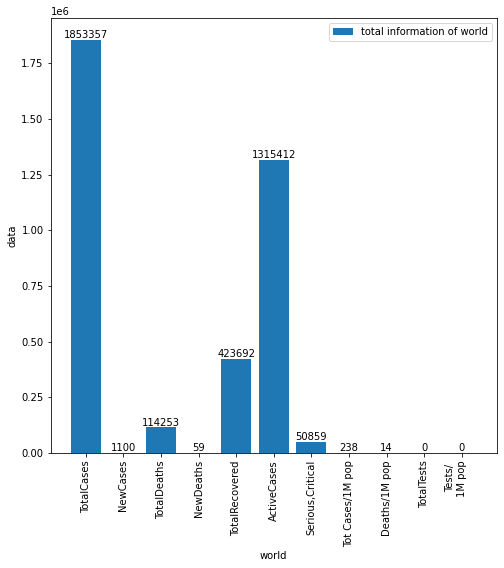

Continent -->  All


In [46]:
#taking user input for country name
s=input('Enter country/continent name for which you want to see the data --> ')

for i in range(0,len(Country)):
    if(Country[i].lower()==s.lower()):
        break;
if(i==len(Country)-1):
    print('Invalid Country/continent name!')
else:
    #taking that country's data
    y=[]
    y.append(TotalCases[i])
    y.append(NewCases[i])
    y.append(TotalDeaths[i])
    y.append(NewDeaths[i])
    y.append(TotalRecovered[i])
    y.append(ActiveCases[i])
    y.append(Serious[i])
    y.append(TotCases1Mpop[i])
    y.append(Deaths1Mpop[i])
    y.append(TotalTests[i])
    y.append(Tests1Mpop[i])
    #setting size of graph
    plt.figure(figsize=(8,8))
    #setting labels
    plt.xlabel(s)
    plt.ylabel('data')
    #bar graph
    plt.bar(x[1:len(x)-1],y,label='total information of {}'.format(s))
    #to display values on top of each bar
    for a,b in zip(x[1:len(x)-1],y):
        plt.text(a,b,b,ha='center',va='bottom')
    #rotate x-axis labels by 45 degrees.
    plt.xticks(rotation=90)
    #to set y-axis range
    plt.ylim(0, (max(y)+(10**(len(str(max(y)))-2))))
    #to enable the labels
    plt.legend()
    #to display the graph
    plt.show()
    #to print that country's continent
    print('Continent --> ',Continent[i])